In [1]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('C:/Users/User/Desktop/做品/aug_train.csv')
train_df2=pd.read_csv('C:/Users/User/Desktop/做品/aug_train.csv')
test_df=pd.read_csv('C:/Users/User/Desktop/做品/aug_test.csv')

<h1>員工離職預測</h1>
<h3>目標：分析並建立一預測模型，以能夠預測哪些員工有離職可能性。</h3>
    <h4>說明：該資料集記錄了許多在不同城市、公司、產業上班的資料科學家與其個人背景資料。主要用意在於希望藉此能分析出，怎樣的情境、變因可能會使這些資料科學家想離職、轉換工作。此外並建立一預測模型，使能夠預測員工，甚至求職者在未來的去留，以藉此達到降低人力資源管理的成本。</h4>
        <h4>資料來源：Kaggle(https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)</h4>
       <h5>欄位資料:
           
enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change
           </h5>
<h4> * last_new_job(現有工作與前一份工作的年距)，該詞其實有蠻大的爭論，kaggle上許多挑戰者對於它的解讀都有所不同。例如我上一份工作的起始年分為2018，而我現今的工作起始年分為2020。此時就可以說我的last_new_job值為2。相對的，假如今天定義成我前一份工作做到2020，然後也在2020換了新工作做到了今天(2021)，那此時last_new_job就變成1了。綜上所述可以發現上述兩種含意天差地遠，但卻又都符合原題目所給的定義。不過在這裡，綜觀而言會以第二種定義較符合情境，也就是紀錄「目前現任工作做了N年」。

In [2]:
train_df.info() #訓練集資料，主要作為分析與模型的建立。
train_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


<h2>Step1 EDA

<h3>遺漏值觀察</h3>

In [3]:
print(train_df.isnull().sum()/19158) 

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64


* 發現資料集中，擁有遺漏值的出現。其中又以company_size與company_type所遺漏的佔比最高，將近30%左右。

<h3>資料視覺化處理

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
def nom_plot(nom_col):
    nom_data=train_df[nom_col]
    nom_data_counts=nom_data.value_counts()
    plt.title(nom_col)
    plt.bar(nom_data_counts.index,nom_data_counts)
    print('{}:\n{}'.format(nom_col,nom_data_counts))
    print('{}:\n{}'.format(nom_col,nom_data_counts/19158))
    plt.show()

target:
0.0    14381
1.0     4777
Name: target, dtype: int64
target:
0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


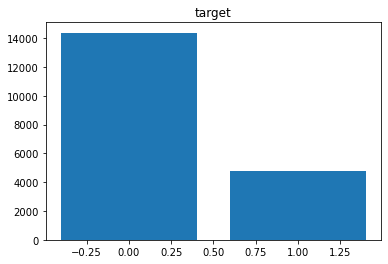

city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_121       3
city_129       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64
city:
city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
              ...   
city_111    0.000157
city_121    0.000157
city_129    0.000157
city_140    0.000052
city_171    0.000052
Name: city, Length: 123, dtype: float64


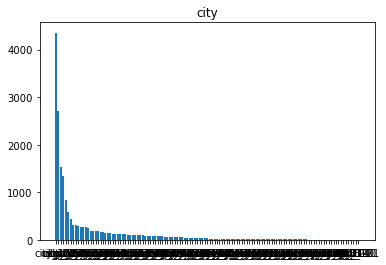

gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
gender:
Male      0.690103
Female    0.064621
Other     0.009970
Name: gender, dtype: float64


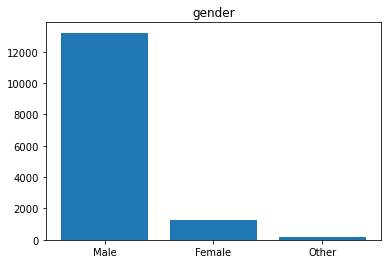

relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64
relevent_experience:
Has relevent experience    0.719908
No relevent experience     0.280092
Name: relevent_experience, dtype: float64


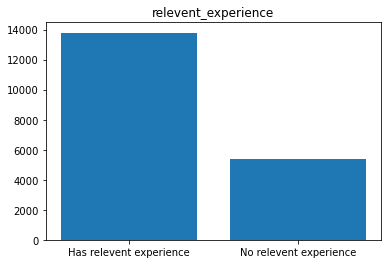

enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
enrolled_university:
no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: enrolled_university, dtype: float64


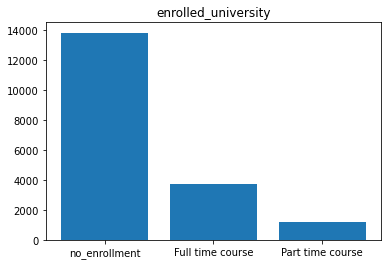

education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
education_level:
Graduate          0.605387
Masters           0.227633
High School       0.105282
Phd               0.021610
Primary School    0.016077
Name: education_level, dtype: float64


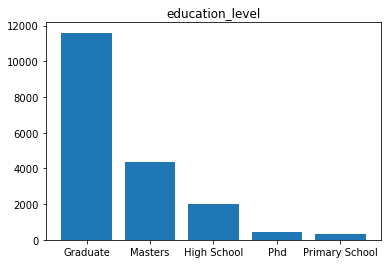

major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
major_discipline:
STEM               0.756446
Humanities         0.034920
Other              0.019887
Business Degree    0.017069
Arts               0.013206
No Major           0.011640
Name: major_discipline, dtype: float64


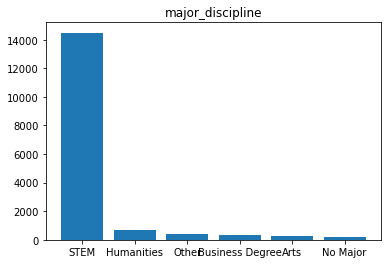

experience:
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64
experience:
>20    0.171521
5      0.074642
4      0.073233
3      0.070675
6      0.063472
2      0.058827
7      0.053659
10     0.051415
9      0.051154
8      0.041862
15     0.035807
11     0.034659
14     0.030588
1      0.028656
<1     0.027247
16     0.026516
12     0.025786
13     0.020827
17     0.017852
19     0.015868
18     0.014615
20     0.007725
Name: experience, dtype: float64


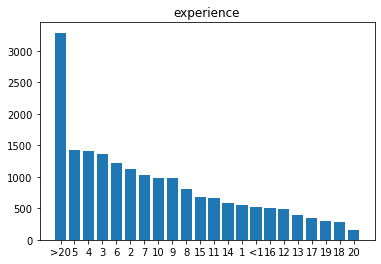

company_size:
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
company_size:
50-99        0.160925
100-500      0.134200
10000+       0.105387
10/49        0.076783
1000-4999    0.069318
<10          0.068274
500-999      0.045777
5000-9999    0.029387
Name: company_size, dtype: float64


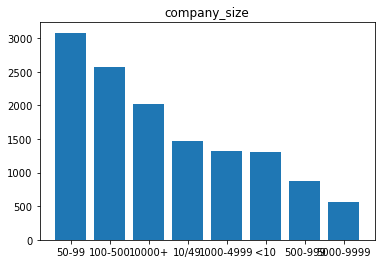

company_type:
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
company_type:
Pvt Ltd                0.512423
Funded Startup         0.052250
Public Sector          0.049849
Early Stage Startup    0.031475
NGO                    0.027195
Other                  0.006316
Name: company_type, dtype: float64


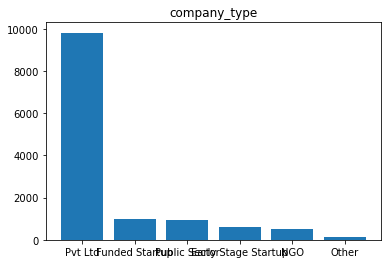

last_new_job:
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64
last_new_job:
1        0.419668
>4       0.171730
2        0.151373
never    0.127988
4        0.053711
3        0.053450
Name: last_new_job, dtype: float64


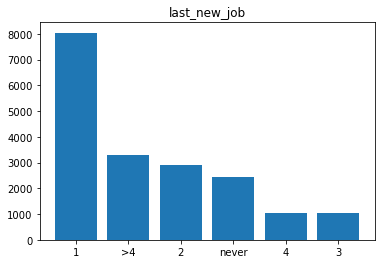

In [5]:
nom=['target','city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience',
    'company_size','company_type','last_new_job']
for i in nom:
    nom_plot(i)

    

* 藉此除了可以了解各類別變項分布情形外，也發現到該資料集為不平衡資料集，因為我們的目標變項(target)可發現，會離職的員工僅占了將近25%左右而已。

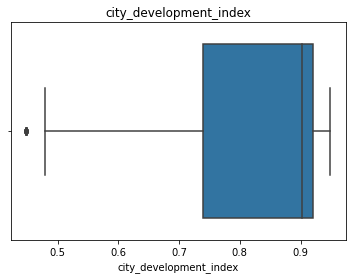

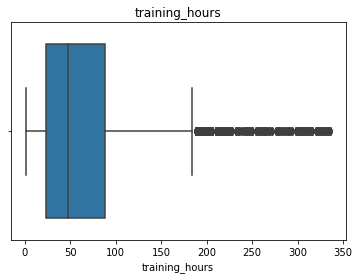

In [6]:
def num_plot(nom_col):
    sns.boxplot(data=train_df,x=nom_col)
    plt.title(nom_col)
    plt.show()
num=['city_development_index','training_hours']
for i in num:
    num_plot(i)

* 在了解整體資料分佈型態後，接著可針對不同群體的人(離職或不離職)，進行進一步探討，以了解不同族群可能會有怎樣的特性。

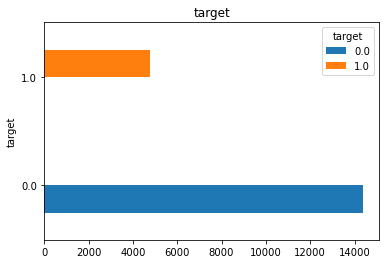

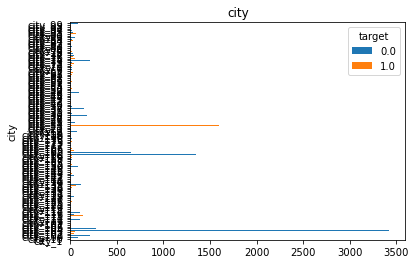

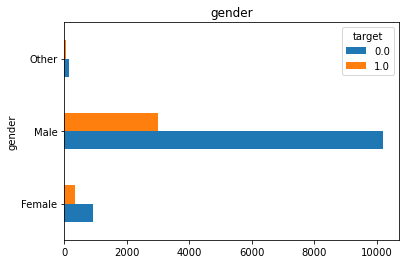

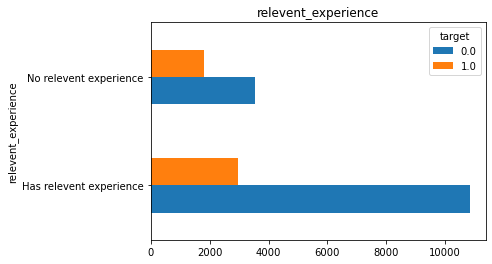

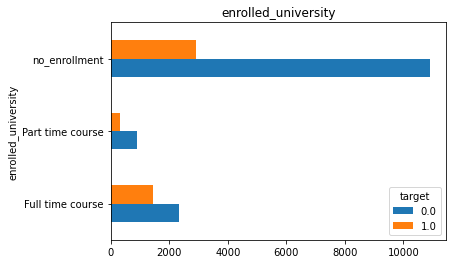

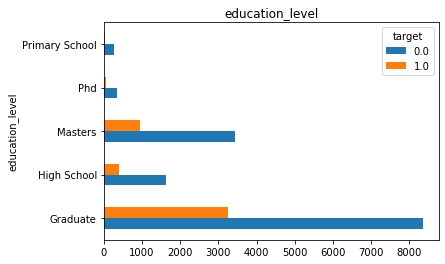

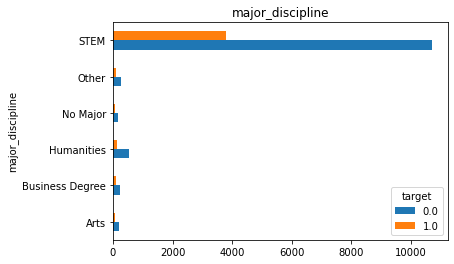

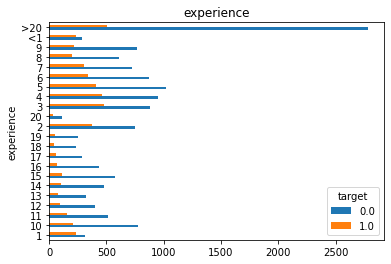

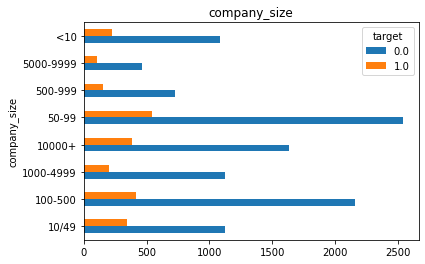

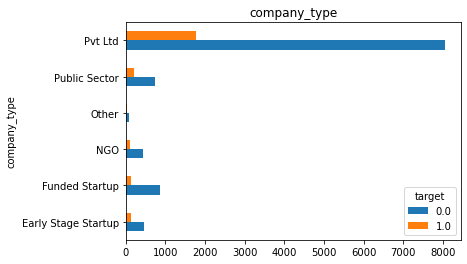

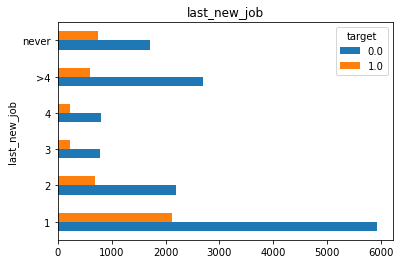

In [7]:
def nom_compare(nom_col):
    pd.crosstab(train_df[nom_col],train_df['target']).plot(kind='barh')
    plt.title(nom_col)
    plt.show()
for i in nom:
    nom_compare(i)

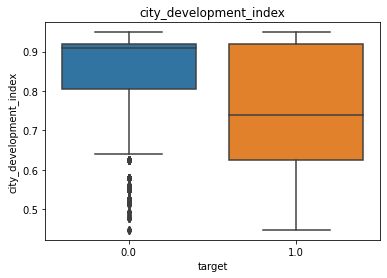

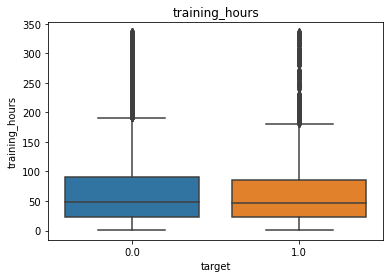

In [8]:
def num_compare(num_col):
    sns.boxplot(data=train_df,x=train_df['target'],y=train_df[num_col])
    plt.title(num_col)
    plt.show()
for i in num:
    num_compare(i)

* 經過不同形式的視覺化處理後，對我而言資料有點過於雜亂、可讀性差，因此我決定先做一些資料處理與轉換。

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<h3>Label encoding</h3>

* 雖然可以直接透過sklearn裡的LabelEncoder()直接進行，但可發現當中部分類別型資料是有先後、階級、大小區分的，因此為了保留其特性，於此主要利用map的方式進行定義與轉換。

In [10]:
gender_map={
    'Male':0,
    'Female':1,
    'Other':2
}
relevent_experience_map={
    'No relevent experience':0,
    'Has relevent experience':1
}

enrolled_university_map={
    'no_enrollment':0,
    'Part time course':1,
    'Full time course':2
}

education_level_map={
    'Primary School':0,
    'High School':1,
    'Graduate':2,
    'Masters':3,
    'Phd':4
}

major_discipline_map={
    'STEM':0,
    'Other':1,
    'No Major':2,
    'Humanities':3,
    'Business Degree':4,
    'Arts':5
}

company_type_map={
    'Pvt Ltd':0,
    'Public Sector':1,
    'Other':2,
    'NGO':3,
    'Funded Startup':4,
    'Early Stage Startup':5
}
    
company_size_map={
    '<10':0,
    '10/49':1,
    '50-99':2,
    '100-500':3,
    '500-999':4,
    '1000-4999':5,
    '5000-9999':6,
    '10000+':7
}

last_new_job_map={
    'never':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '>4':5
}

experience_map={
    '<1':0,
    '1':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10':10,
    '11':11,
    '12':12,
    '13':13,
    '14':14,
    '15':15,
    '16':16,
    '17':17,
    '18':18,
    '19':19,
    '20':20,
    '>20':21
}

train_df['gender']=train_df['gender'].map(gender_map)
train_df['education_level']=train_df['education_level'].map(education_level_map)
train_df['company_size']=train_df['company_size'].map(company_size_map)
train_df['last_new_job']=train_df['last_new_job'].map(last_new_job_map)
train_df['experience']=train_df['experience'].map(experience_map)
train_df['relevent_experience']=train_df['relevent_experience'].map(relevent_experience_map)
train_df['enrolled_university']=train_df['enrolled_university'].map(enrolled_university_map)
train_df['major_discipline']=train_df['major_discipline'].map(major_discipline_map)
train_df['company_type']=train_df['company_type'].map(company_type_map)

In [11]:
#檢查是否轉換成功
train_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,city_40,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,city_21,0.624,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,city_115,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,52,1.0
4,666,city_162,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,0.0,0,0.0,2.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,city_103,0.920,0.0,1,0.0,2.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,city_103,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44,0.0
19156,5756,city_65,0.802,0.0,1,0.0,1.0,NaN,0.0,4.0,0.0,2.0,97,0.0


In [12]:
#檢查是否轉換成功
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  float64
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     18772 non-null  float64
 6   education_level         18698 non-null  float64
 7   major_discipline        16345 non-null  float64
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  float64
 10  company_type            13018 non-null  float64
 11  last_new_job            18735 non-null  float64
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(10), int64(3), object(1)
me

<h3>資料視覺化處理</h3>

* 延續先前的分析。

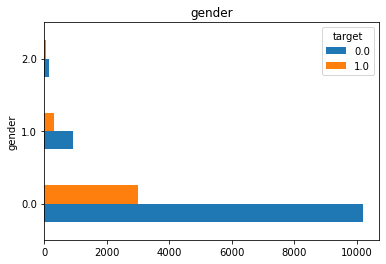

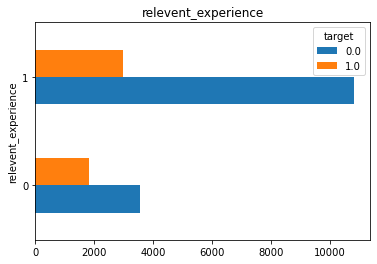

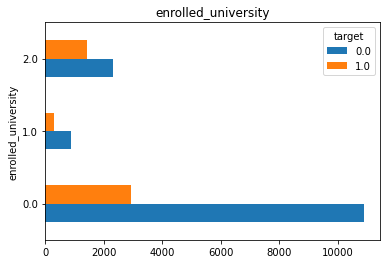

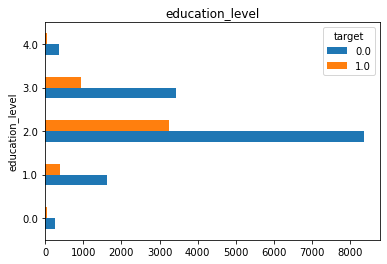

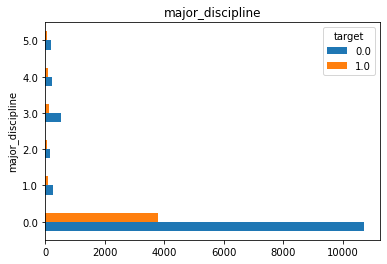

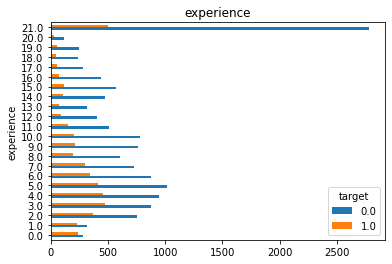

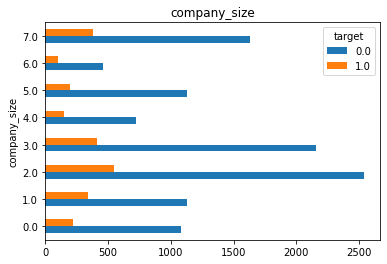

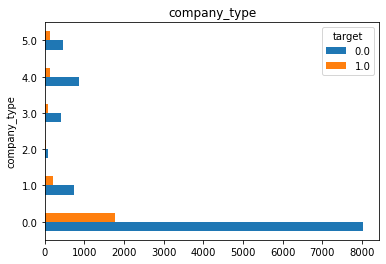

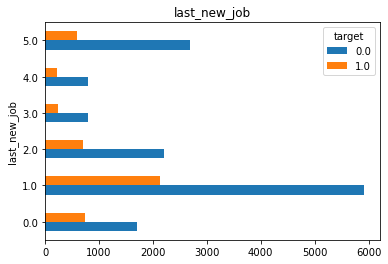

In [13]:
new_nom=['gender','relevent_experience','enrolled_university','education_level','major_discipline','experience',
    'company_size','company_type','last_new_job']
for i in new_nom:
    nom_compare(i)

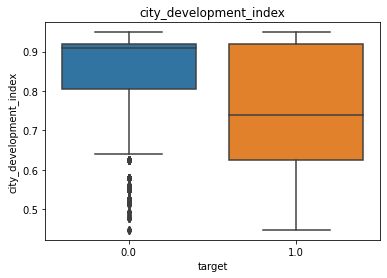

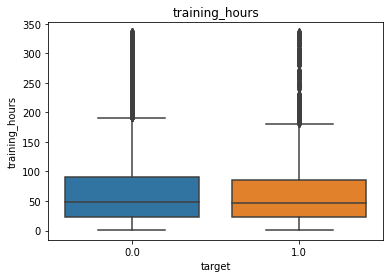

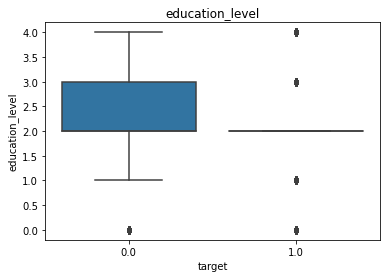

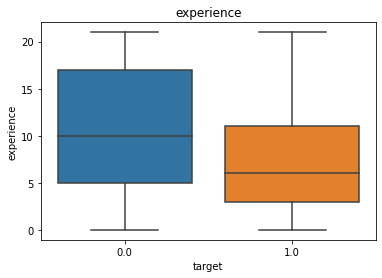

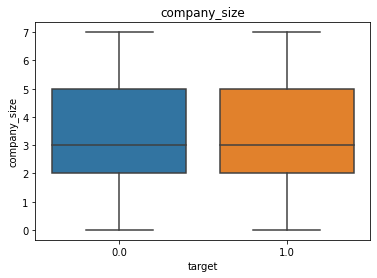

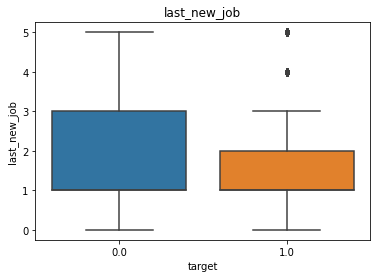

In [14]:
num_2=['city_development_index','training_hours','education_level','experience','company_size','last_new_job']
for i in num_2:
    num_compare(i)

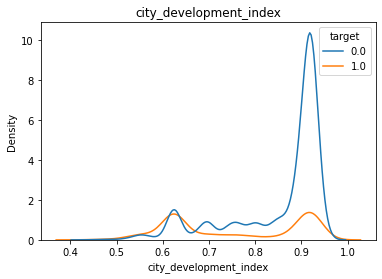

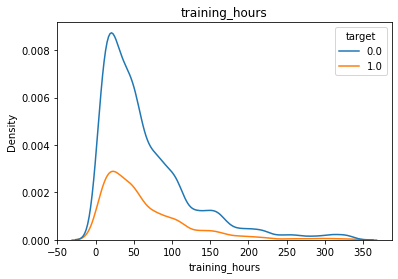

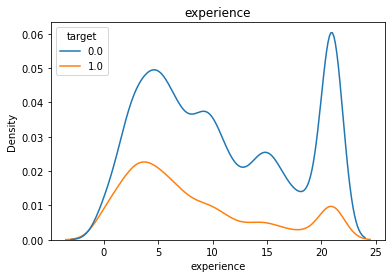

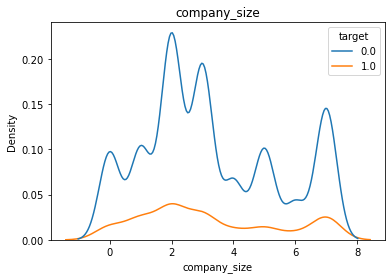

In [15]:
def num_compare2(num_col):
    sns.kdeplot(data=train_df,x=train_df[num_col],hue=train_df['target'])
    plt.title(num_col)
    plt.show()

num_3=['city_development_index','training_hours','experience','company_size']
for i in num_3:
    num_compare2(i)

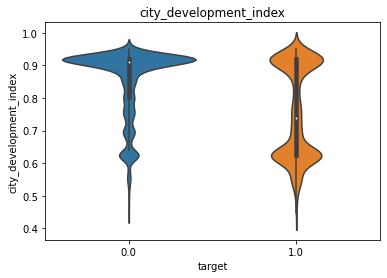

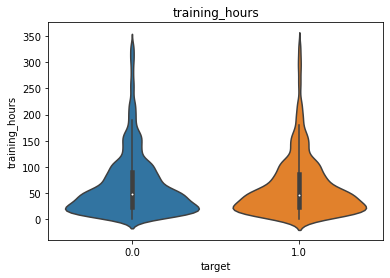

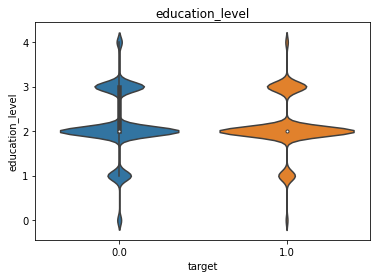

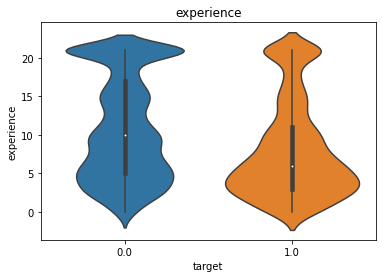

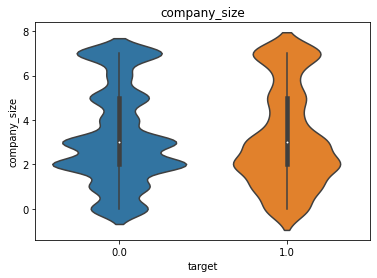

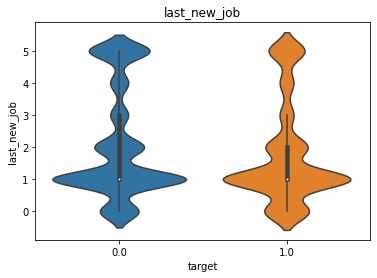

In [16]:
def num_compare3(num_col):
    sns.violinplot(data=train_df,y=train_df[num_col],x=train_df['target'])
    plt.title(num_col)
    plt.show()
for i in num_2:
    num_compare3(i)

In [17]:
#for i in num_2:
#    for j in num_2:
#        sns.relplot(data=train_df,x=i,y=j,hue='target')
#        plt.show()

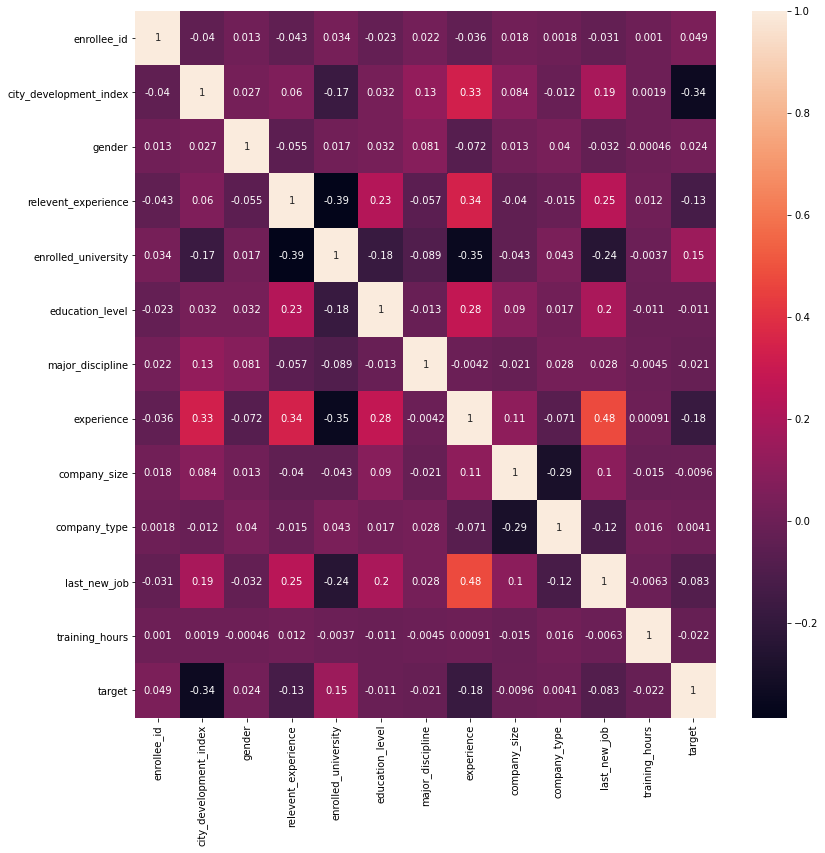

In [18]:
# 相關分析
fig,ax=plt.subplots(figsize=(13,13))
sns.heatmap(train_df.corr(),annot=True,ax=ax)
plt.show()

<h3> EDA結果:</h3>

* 藉由城市展指數可發現，傾向離職的員工其分佈呈現雙峰。意即城市發展指數越低，越容易增加員工的離職意願。但城市發展指數越高的城市，似乎也會造成員工離職意願的提升。前者可能因所待的城市之發展指數不高，相對其基礎設施、福利，甚至治安、便利等問題都造成生活上的不便，以至於員工想至其他發展指數較高的城市工作、定居。後者則有可能因高度發展的城市，其物價相對於其他城市也較高，而造成員工生活上的壓力，故決定辭去工作至其他城市。

* 若以繼續留任的角度觀察，則可明顯發現到其分佈大多落在0.9左右，意即若公司設立於發展指數較高的城市，還是較容易留住人才。

* 雖然藉由EDA發現傾向離職的員工，對於城市發展指數的特性呈現較為不明顯，但藉由相關分析仍發現，離職意願與城市發展指相關係數為-0.38，為中度負相關。意即城市發展指數越低，還是較容易造成員工離職意願的提高。

* 從工作經歷(experience)可發現，傾向離職的員工其經歷分佈大多在10年內，尤其以5年左右區間為大多數。而原因可能為單純想追求更好的工作環境、發展等，故有較高的離職率。反之工作經歷愈久，相對代表年紀愈大之外，也可能因已有了婚姻與家庭，故相較之下較沒辦法承受離職、轉職所帶來的風險。

* 另外由last_new_job可發現，大多選擇離職的員工，在到新任職的公司後一年，就決定再次離職、轉換工作。其原因可能在到新公司任職後，才發現與理想不符，故造成該情況的產生。

* 除此之外也可以發現last_new_job 與 工作經歷呈現正中度正相關，相關係數為0.48。意即現在新任職的工作待愈久(last_new_job)，其工作經歷(experience)也會愈高。

<h2>Step2 資料前處理</h2>

* 在進行完上述基本的探索性資料分析後，接著就可以進行正式的資料前處理，例如資料清理、轉換等分析前置作業。

In [19]:
#將測試集的資料讀入，並給予我們自訂的target(-1)，以利於能夠將訓練與測試集資料進行整併，並同時進行資料的前處理，以確保整體一致性。
test_df['target'] = -1
test_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,-1
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,-1
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,-1
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,-1
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,-1
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,-1
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,-1
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,-1


 * 可以發現到測試資料當中，也遺漏值的存在。 

In [20]:
#訓練與測試集資料整併
data_df=pd.concat([train_df2,test_df],axis=0).reset_index(drop=True)
data_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,-1.0
21283,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,-1.0
21284,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,-1.0
21285,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,-1.0


<h3>Label encoding</h3>

In [21]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
data_df['gender']=data_df['gender'].map(gender_map)
data_df['education_level']=data_df['education_level'].map(education_level_map)
data_df['company_size']=data_df['company_size'].map(company_size_map)
data_df['last_new_job']=data_df['last_new_job'].map(last_new_job_map)
data_df['experience']=data_df['experience'].map(experience_map)
data_df['relevent_experience']=data_df['relevent_experience'].map(relevent_experience_map)
data_df['enrolled_university']=data_df['enrolled_university'].map(enrolled_university_map)
data_df['major_discipline']=data_df['major_discipline'].map(major_discipline_map)
data_df['company_type']=data_df['company_type'].map(company_type_map)
city_encoder=LabelEncoder()
data_df.loc[:,'city']=city_encoder.fit_transform(data_df.loc[:,'city'])
data_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,64,0.624,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,14,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,52,1.0
4,666,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,NaN,1.0,4.0,15,-1.0
21283,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,NaN,NaN,2.0,30,-1.0
21284,31762,2,0.887,0.0,0,0.0,0.0,NaN,3.0,NaN,0.0,0.0,18,-1.0
21285,7873,4,0.804,0.0,1,2.0,1.0,NaN,7.0,3.0,1.0,1.0,84,-1.0


In [22]:
#再將資料即拆分為原本的訓練與測試資料集
train_dataset=data_df[data_df['target']!=-1].reset_index(drop=True)
test_dataset=data_df[data_df['target']==-1].reset_index(drop=True)
test_dataset=test_dataset.drop(['target'],axis=1)
train_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,0.0,1,0.0,2.0,0.0,21.0,NaN,NaN,1.0,36,1.0
1,29725,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,64,0.624,NaN,0,2.0,2.0,0.0,5.0,NaN,NaN,0.0,83,0.0
3,33241,14,0.789,NaN,0,NaN,2.0,4.0,0.0,NaN,0.0,0.0,52,1.0
4,666,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,0.0,0,0.0,2.0,3.0,14.0,NaN,NaN,1.0,42,1.0
19154,31398,5,0.920,0.0,1,0.0,2.0,0.0,14.0,NaN,NaN,4.0,52,1.0
19155,24576,5,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44,0.0
19156,5756,94,0.802,0.0,1,0.0,1.0,NaN,0.0,4.0,0.0,2.0,97,0.0


In [23]:
test_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,78,0.827,0.0,1,2.0,2.0,0.0,9.0,0.0,NaN,1.0,21
1,9858,5,0.920,1.0,1,0.0,2.0,0.0,5.0,NaN,0.0,1.0,98
2,31806,64,0.624,0.0,0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,15
3,27385,26,0.827,0.0,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,5,0.920,0.0,1,0.0,2.0,0.0,21.0,7.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,NaN,1.0,4.0,15
2125,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,NaN,NaN,2.0,30
2126,31762,2,0.887,0.0,0,0.0,0.0,NaN,3.0,NaN,0.0,0.0,18
2127,7873,4,0.804,0.0,1,2.0,1.0,NaN,7.0,3.0,1.0,1.0,84


<h3>遺漏值處理</h3>

* 若該類別遺漏值佔總體10%內或超過60%以上，直接予以刪除。其餘則用-1做為新的category。

In [24]:
train_dataset['gender'].fillna(value=-1,inplace=True)
train_dataset['major_discipline'].fillna(value=-1,inplace=True)
train_dataset['company_size'].fillna(value=-1,inplace=True)
train_dataset['company_type'].fillna(value=-1,inplace=True)
train_dataset.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],axis=0,inplace=True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  int32  
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  float64
 4   relevent_experience     18014 non-null  int64  
 5   enrolled_university     18014 non-null  float64
 6   education_level         18014 non-null  float64
 7   major_discipline        18014 non-null  float64
 8   experience              18014 non-null  float64
 9   company_size            18014 non-null  float64
 10  company_type            18014 non-null  float64
 11  last_new_job            18014 non-null  float64
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(10), int32(1), int64(3)
mem

In [25]:
#填補後檢查
train_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,5,0.920,0.0,1,0.0,2.0,0.0,21.0,-1.0,-1.0,1.0,36,1.0
1,29725,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47,0.0
2,11561,64,0.624,-1.0,0,2.0,2.0,0.0,5.0,-1.0,-1.0,0.0,83,0.0
4,666,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8,0.0
5,21651,57,0.764,-1.0,1,1.0,2.0,0.0,11.0,-1.0,-1.0,1.0,24,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,0.0,0,0.0,2.0,3.0,14.0,-1.0,-1.0,1.0,42,1.0
19154,31398,5,0.920,0.0,1,0.0,2.0,0.0,14.0,-1.0,-1.0,4.0,52,1.0
19155,24576,5,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44,0.0
19156,5756,94,0.802,0.0,1,0.0,1.0,-1.0,0.0,4.0,0.0,2.0,97,0.0


In [26]:
#定義X與y
x=train_dataset.iloc[:,1:13]
y=train_dataset.iloc[:,13]
x

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,5,0.920,0.0,1,0.0,2.0,0.0,21.0,-1.0,-1.0,1.0,36
1,77,0.776,0.0,0,0.0,2.0,0.0,15.0,2.0,0.0,5.0,47
2,64,0.624,-1.0,0,2.0,2.0,0.0,5.0,-1.0,-1.0,0.0,83
4,50,0.767,0.0,1,0.0,3.0,0.0,21.0,2.0,4.0,4.0,8
5,57,0.764,-1.0,1,1.0,2.0,0.0,11.0,-1.0,-1.0,1.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,0.878,0.0,0,0.0,2.0,3.0,14.0,-1.0,-1.0,1.0,42
19154,5,0.920,0.0,1,0.0,2.0,0.0,14.0,-1.0,-1.0,4.0,52
19155,5,0.920,0.0,1,0.0,2.0,0.0,21.0,2.0,0.0,4.0,44
19156,94,0.802,0.0,1,0.0,1.0,-1.0,0.0,4.0,0.0,2.0,97


<h2>Step3 Modeling</h2>

* 由於先前提到，這是不平衡的資料集，所以在這裡主要利用resampling的方式進行處理

* 這裡主要利用SMOTE、Tomek links、SMOTEENN三種方式

* 首先運用不同的資料平衡策略與機器學習模型，進行不同的排列組合建模，以初步挑選出合適的組合方式。

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb

def model_observe(resample,model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
    model_pipe=make_pipeline(resample,model)
    model_score=cross_val_score(model_pipe,x,y,cv=k,scoring='roc_auc')
    
    print('------------------')
    print(title)
    print(model_score)
    print(model_score.mean())
    
model_observe(SMOTE(),DecisionTreeClassifier(),'SMOTE + Tree')
model_observe(TomekLinks(),DecisionTreeClassifier(),'TomekLinks + Tree')
model_observe(SMOTEENN(),DecisionTreeClassifier(),'SMOTEENN + Tree')

model_observe(SMOTE(),RandomForestClassifier(),'SMOTE + Random Forest')
model_observe(TomekLinks(),RandomForestClassifier(),'TomekLinks + Random Forest')
model_observe(SMOTEENN(),RandomForestClassifier(),'SMOTEENN Random Forest')

model_observe(SMOTE(),BaggingClassifier(),'SMOTE + Bagging')
model_observe(TomekLinks(),BaggingClassifier(),'TomekLinks + Bagging')
model_observe(SMOTEENN(),BaggingClassifier(),'SMOTEENN + Bagging')

model_observe(SMOTE(),GradientBoostingClassifier(),'SMOTE + Gradient Boosting')
model_observe(TomekLinks(),GradientBoostingClassifier(),'TomekLinks + Gradient Boosting')
model_observe(SMOTEENN(),GradientBoostingClassifier(),'SMOTEENN + Gradient Boosting')

model_observe(SMOTE(),XGBClassifier(),'SMOTE + XGBoost')
model_observe(TomekLinks(),XGBClassifier(),'TomekLinks + XGBoost')
model_observe(SMOTEENN(),XGBClassifier(),'SMOTEENN + XGBoost')

lgbm_model=lgb.LGBMClassifier()
model_observe(SMOTE(random_state=111),lgbm_model,'SMOTE + LGBM')
model_observe(TomekLinks(),lgbm_model,'TomekLinks LGBM')
model_observe(SMOTEENN(random_state=111),lgbm_model,'SMOTEENN + LGBM')

------------------
SMOTE + Tree
[0.64662992 0.61866054 0.61675631 0.62775608 0.6322235 ]
0.6284052699630724
------------------
TomekLinks + Tree
[0.63927219 0.65111525 0.63049968 0.6413634  0.65228958]
0.6429080177196842
------------------
SMOTEENN + Tree
[0.72240493 0.69087151 0.71179058 0.70575005 0.71551563]
0.7092665427277961
------------------
SMOTE + Random Forest
[0.79549623 0.79219157 0.78815159 0.79073417 0.78300021]
0.7899147553995733
------------------
TomekLinks + Random Forest
[0.80835526 0.79349899 0.78649241 0.79215933 0.7879981 ]
0.7937008188374117
------------------
SMOTEENN Random Forest
[0.78854862 0.80081574 0.79250173 0.79399637 0.79113872]
0.7934002360185436
------------------
SMOTE + Bagging
[0.75194414 0.76485732 0.76678735 0.7478994  0.76001348]
0.7583003371910113
------------------
TomekLinks + Bagging
[0.74141048 0.76371799 0.78019289 0.76776983 0.77825411]
0.7662690593448506
------------------
SMOTEENN + Bagging
[0.78804642 0.78888195 0.77729556 0.7961729  0

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------
SMOTE + XGBoost
[0.79947036 0.80028653 0.78685832 0.790963   0.79128293]
0.7937722283997786


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------
TomekLinks + XGBoost
[0.79293037 0.79440139 0.80258413 0.79506207 0.77494119]
0.7919838287062049


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:38:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
------------------
SMOTEENN + XGBoost
[0.78093563 0.80376236 0.79354996 0.77794896 0.78219841]
0.7876790631571229
------------------
SMOTE + LGBM
[0.80429736 0.80844971 0.80181778 0.80278362 0.79164856]
0.8017994068861538
------------------
TomekLinks LGBM
[0.80265898 0.81180302 0.80068302 0.79298643 0.78836269]
0.799298828592062
------------------
SMOTEENN + LGBM
[0.79377034 0.79017231 0.78871532 0.81089438 0.79025493]
0.7947614582937309


* 可以發現有部分模型和resampling的組合，在AUC的表現上還算不錯。在這裡我主要挑選AUC平均值，至少大於75的組合，來進行後續的建模與參數調整。

<h3>Modeling function建立</h3>

* 因為在此進行許多不同預測模型的建立，故藉此避免重複coding所造成的凌亂。

In [29]:
# Modeling function
import time
from sklearn.metrics import roc_auc_score
accuracy={}
f1={}
recall={}
auc={}
speed={}

def model_training(x_res,y_res,model,title):
    #x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)
    #x_res,y_res=resample.fit_resample(x_train,y_train)
    start=time.time()
    model.fit(x_res,y_res)
    end=time.time()
    model_pred=model.predict(x_test)
    acc=accuracy_score(y_test,model_pred)
    accuracy[title]=acc
    train_score=model.score(x_res,y_res)
    f_s=f1_score(y_test,model_pred)
    f1[title]=f_s
    recall_res=recall_score(y_test,model_pred)
    recall[title]=recall_res
    y_pred=model.predict_proba(x_test)[:,1]
    auc_res=roc_auc_score(y_test,y_pred)
    auc[title]=auc_res
    total_time=end-start
    speed[title]=total_time
    cm=confusion_matrix(y_test,model_pred)
    sns.heatmap(cm,annot=True,fmt='.2f')
    plt.title(title)
    plt.show()
    
    print(classification_report(y_test,model_pred))
    print('Accuracy:%.2f'%(acc))
    print('Training score:%.2f'%(train_score))
    print('F1 score:%.2f'%(f_s))
    print('Recall:%.2f'%(recall_res))
    print('AUC:%.2f'%(auc_res))
    print('Times:%.2f'%(total_time))
    result_form=pd.DataFrame({
                         'Accuracy':accuracy,
                         'F1':f1,
                         'Recall':recall,
                         'AUC':auc,
                         'Speed(s)':speed})
    return result_form

<h3>Learning curve</h3>

* Learning curve除了能夠評估整體模型效能外，也可以藉此觀察是否有overfitting或underfitting的問題產生。

In [36]:
#Learning curve(roc_auc)
from sklearn.model_selection import StratifiedKFold
def overfitting_check(model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    train_sizes,train_score,test_score=learning_curve(model,x,y,cv=k,scoring='roc_auc',n_jobs=-1,train_sizes=np.linspace(0.01,1.0,8))
    
    train_score_mean=np.mean(train_score,axis=1)
    train_score_std=np.std(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    test_score_std=np.std(test_score,axis=1)
    
    plt.fill_between(train_score_mean-train_score_std,train_score_mean+train_score_std,alpha=0.1,color='r')
    plt.fill_between(test_score_mean-test_score_std,test_score_mean+test_score_std,alpha=0.1,color='g')
    
    plt.plot(train_sizes,train_score_mean,'-o',color='r',label='Training')
    plt.plot(train_sizes,test_score_mean,'-o',color='g',label='Cross_Validation')
    
    plt.grid()
    plt.ylabel('AUC')
    plt.title(title)
    plt.legend()
    plt.show()

In [37]:
#learning curve(loss)
def overfitting_check_loss(model,title):
    k=StratifiedKFold(n_splits=5,shuffle=True)
    train_sizes,train_loss,test_loss=learning_curve(model,x,y,cv=k,scoring='neg_log_loss',n_jobs=-1,train_sizes=np.linspace(0.01,1.0,8))
    
    train_loss_mean=-np.mean(train_loss,axis=1)
    test_loss_mean=-np.mean(test_loss,axis=1)
    
    plt.plot(train_sizes,train_loss_mean,'-o',color='r',label='Training')
    plt.plot(train_sizes,test_loss_mean,'-o',color='g',label='Cross_Validation')
    
    plt.grid()
    plt.ylabel('loss')
    plt.title(title)
    plt.legend()
    plt.show()

<h3> SMOTE + Random Forest之參數調整</h3>

* 透過Random Search方式進行參數調整。
* 雖然透過Random Search方式可讓我們快速找到最佳的參數值，但透過learning curve觀察時，可能還是會有些overfitting或是underfitting的情況產生，故會進行一些手動微調，以達到較理想的目標。

In [38]:
# 利用Random Search的方式進行最佳參數的調整。
from scipy.stats import randint
from sklearn.model_selection import StratifiedKFold

k=StratifiedKFold(n_splits=10,shuffle=True)
rfc_params={
    'randomforestclassifier__n_estimators':randint(1,1000),
    'randomforestclassifier__max_depth':randint(3,20),
    'randomforestclassifier__min_samples_leaf':randint(1,100)
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
smote_rfc_pipe=make_pipeline(SMOTE(random_state=111),RandomForestClassifier(random_state=111))
rfc_smote_optimal=RandomizedSearchCV(smote_rfc_pipe,rfc_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
rfc_smote_optimal.fit(x_train,y_train)
print(rfc_smote_optimal.best_params_)
print(rfc_smote_optimal.best_score_)

{'randomforestclassifier__max_depth': 15, 'randomforestclassifier__min_samples_leaf': 42, 'randomforestclassifier__n_estimators': 587}
0.8024780679800143


<h3>SMOTE + Random Forest預測模型建立

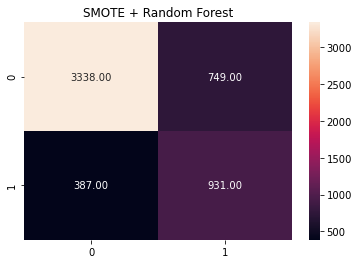

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.85      4087
         1.0       0.55      0.71      0.62      1318

    accuracy                           0.79      5405
   macro avg       0.73      0.76      0.74      5405
weighted avg       0.81      0.79      0.80      5405

Accuracy:0.79
Training score:0.84
F1 score:0.62
Recall:0.71
AUC:0.80
Times:7.66


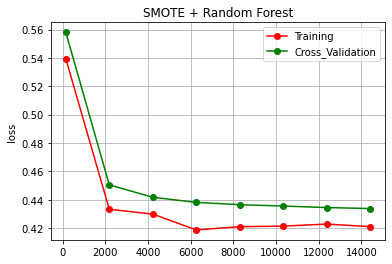

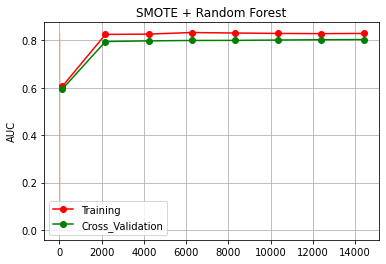

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=742,max_depth=9,min_samples_leaf=50,random_state=111) #雖然利用Random Search的方式進行參數調正，但我仍會進行一些微調，探討是否能擁有更佳的結果。
title='SMOTE + Random Forest'
form=model_training(x_res,y_res,rfc,title)
overfitting_check_loss(rfc,title)
overfitting_check(rfc,title)
form

<h3> Tomek Links + Random Forest之參數調整</h3>

* 透過Random Search方式進行參數調整

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
rfc_tomeklinks_pipe=make_pipeline(TomekLinks(),RandomForestClassifier(random_state=111))
rfc_tomeklinks_optimal=RandomizedSearchCV(rfc_tomeklinks_pipe,rfc_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
rfc_tomeklinks_optimal.fit(x_train,y_train)
print(rfc_tomeklinks_optimal.best_params_)
print(rfc_tomeklinks_optimal.best_score_)

{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__n_estimators': 310}
0.8040557995787783


<h3>Tomek Links + Random Forest預測模型建立

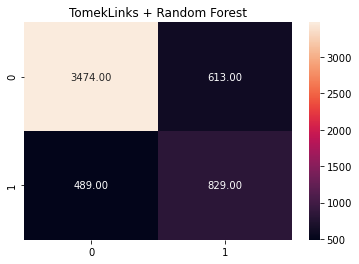

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      4087
         1.0       0.57      0.63      0.60      1318

    accuracy                           0.80      5405
   macro avg       0.73      0.74      0.73      5405
weighted avg       0.80      0.80      0.80      5405

Accuracy:0.80
Training score:0.82
F1 score:0.60
Recall:0.63
AUC:0.80
Times:5.33


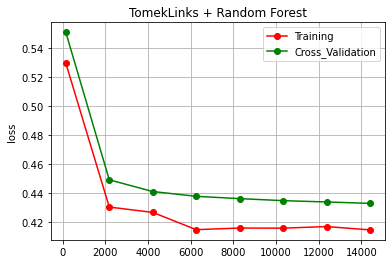

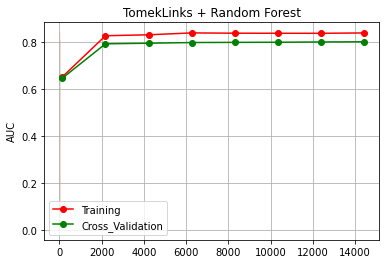

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=860,max_depth=16,min_samples_leaf=45,random_state=111)
title='TomekLinks + Random Forest'
form=model_training(x_res,y_res,rfc,title)
overfitting_check_loss(rfc,title)
overfitting_check(rfc,title)
form

<h3> SMOTEENN + Random Forest之參數調整</h3>

* 透過Random Search方式進行參數調整

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
rfc_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),RandomForestClassifier(random_state=111))
rfc_smoteenn_optimal=RandomizedSearchCV(rfc_smoteenn_pipe,rfc_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
rfc_smoteenn_optimal.fit(x_train,y_train)
print(rfc_smoteenn_optimal.best_params_)
print(rfc_smoteenn_optimal.best_score_)

{'randomforestclassifier__max_depth': 14, 'randomforestclassifier__min_samples_leaf': 24, 'randomforestclassifier__n_estimators': 971}
0.8001026930735021


<h3>SMOTEENN + Random Forest預測模型建立

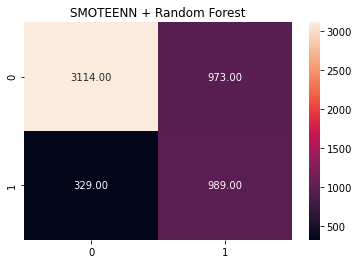

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.83      4087
         1.0       0.50      0.75      0.60      1318

    accuracy                           0.76      5405
   macro avg       0.70      0.76      0.72      5405
weighted avg       0.81      0.76      0.77      5405

Accuracy:0.76
Training score:0.92
F1 score:0.60
Recall:0.75
AUC:0.80
Times:1.55


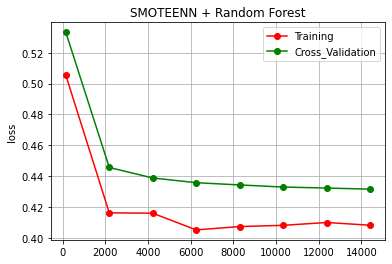

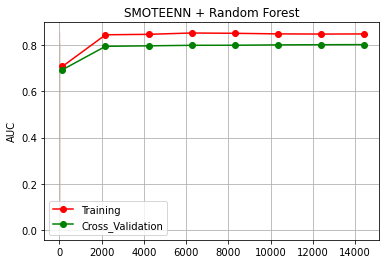

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
rfc=RandomForestClassifier(n_estimators=191,max_depth=12,min_samples_leaf=30,random_state=111)
title='SMOTEENN + Random Forest'
form=model_training(x_res,y_res,rfc,title)
overfitting_check_loss(rfc,title)
overfitting_check(rfc,title)
form

<h3> SMOTE + Bagging之參數調整</h3>

* 透過Random Search方式進行參數調整

In [44]:
bagg_params={
    'baggingclassifier__n_estimators':randint(1,1000),
    'baggingclassifier__bootstrap':[True,False],
    'baggingclassifier__bootstrap_features':[True,False],
    'baggingclassifier__max_features':[0.5,0.6,0.7,0.8,0.9,1.0],
    'baggingclassifier__max_samples':[0.5,0.6,0.7,0.8,0.9,1.0],
    'baggingclassifier__random_state':[111]
}

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
bagg_smote_pipe=make_pipeline(SMOTE(random_state=111),BaggingClassifier())
bagg_smote_optimal=RandomizedSearchCV(bagg_smote_pipe,bagg_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
bagg_smote_optimal.fit(x_train,y_train)
print(bagg_smote_optimal.best_params_)
print(bagg_smote_optimal.best_score_)

{'baggingclassifier__bootstrap': False, 'baggingclassifier__bootstrap_features': True, 'baggingclassifier__max_features': 0.6, 'baggingclassifier__max_samples': 0.5, 'baggingclassifier__n_estimators': 481, 'baggingclassifier__random_state': 111}
0.7996611489698622


<h3>SMOTE + Bagging預測模型建立

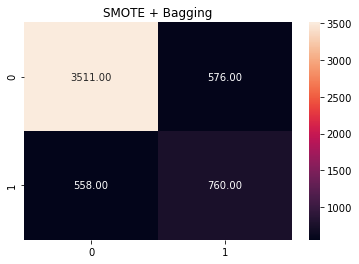

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      4087
         1.0       0.57      0.58      0.57      1318

    accuracy                           0.79      5405
   macro avg       0.72      0.72      0.72      5405
weighted avg       0.79      0.79      0.79      5405

Accuracy:0.79
Training score:0.97
F1 score:0.57
Recall:0.58
AUC:0.79
Times:1.73


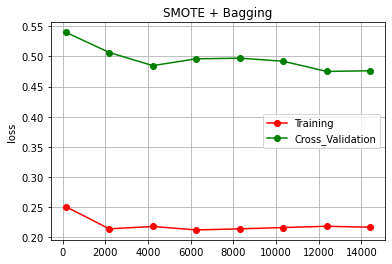

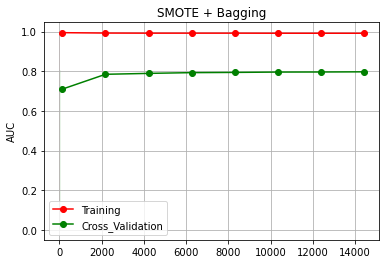

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=BaggingClassifier(n_estimators=63,bootstrap=True,bootstrap_features=False,max_features=0.9,max_samples=0.5,random_state=111)
title='SMOTE + Bagging'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> Tomek Links + Bagging之參數調整</h3>

* 透過Random Search方式進行參數調整

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
bagg_tomeklink_pipe=make_pipeline(TomekLinks(),BaggingClassifier())
bagg_tomeklink_optimal=RandomizedSearchCV(bagg_tomeklink_pipe,bagg_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
bagg_tomeklink_optimal.fit(x_train,y_train)
print(bagg_tomeklink_optimal.best_params_)
print(bagg_tomeklink_optimal.best_score_)

{'baggingclassifier__bootstrap': True, 'baggingclassifier__bootstrap_features': False, 'baggingclassifier__max_features': 0.6, 'baggingclassifier__max_samples': 0.5, 'baggingclassifier__n_estimators': 761, 'baggingclassifier__random_state': 111}
0.8022566017016824


<h3>Tomek Links + Bagging預測模型建立

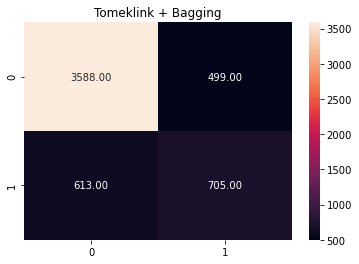

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87      4087
         1.0       0.59      0.53      0.56      1318

    accuracy                           0.79      5405
   macro avg       0.72      0.71      0.71      5405
weighted avg       0.79      0.79      0.79      5405

Accuracy:0.79
Training score:0.93
F1 score:0.56
Recall:0.53
AUC:0.80
Times:3.06


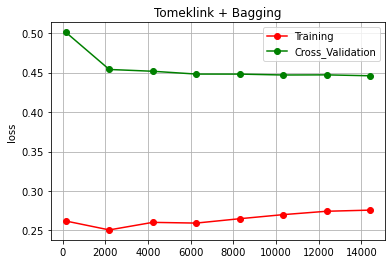

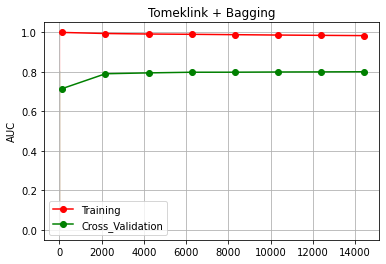

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
model=BaggingClassifier(n_estimators=300,bootstrap=True,bootstrap_features=False,max_features=0.5,max_samples=0.5,random_state=111)
title='Tomeklink + Bagging'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> SMOTEENN + Bagging之參數調整</h3>

* 透過Random Search方式進行參數調整

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
bagg_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),BaggingClassifier())
bagg_optimal=RandomizedSearchCV(bagg_smoteenn_pipe,bagg_params,n_iter=10,cv=k,n_jobs=-1,scoring='roc_auc')
bagg_optimal.fit(x_train,y_train)
print(bagg_optimal.best_params_)
print(bagg_optimal.best_score_)

{'baggingclassifier__bootstrap': True, 'baggingclassifier__bootstrap_features': False, 'baggingclassifier__max_features': 0.6, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__n_estimators': 332, 'baggingclassifier__random_state': 111}
0.7973404954462697


<h3>SMOTEENN + Bagging預測模型建立

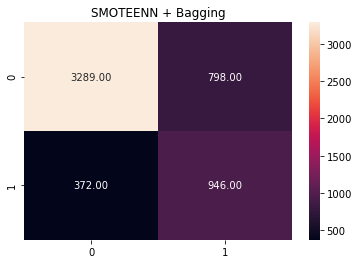

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      4087
         1.0       0.54      0.72      0.62      1318

    accuracy                           0.78      5405
   macro avg       0.72      0.76      0.73      5405
weighted avg       0.81      0.78      0.79      5405

Accuracy:0.78
Training score:0.99
F1 score:0.62
Recall:0.72
AUC:0.80
Times:3.60


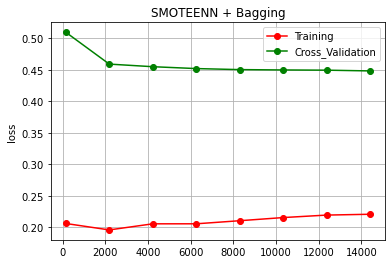

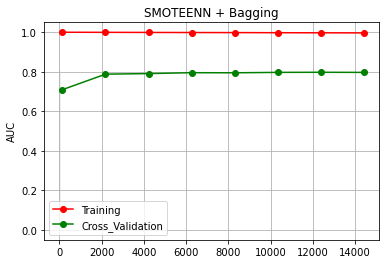

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
model=BaggingClassifier(n_estimators=186,bootstrap=True,bootstrap_features=True,max_features=0.9,max_samples=0.7,random_state=111)
title='SMOTEENN + Bagging'
model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)

<h3> SMOTE + Gradient Boosting之參數調整</h3>

* 透過Random Search方式進行參數調整

In [50]:
grad_params={
    'gradientboostingclassifier__n_estimators':randint(100,1000),
    'gradientboostingclassifier__max_depth':randint(3,20),
    'gradientboostingclassifier__max_features':[0.5,0.6,0.7,0.8,0.9,1],
    'gradientboostingclassifier__subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'gradientboostingclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad_smote_pipe=make_pipeline(SMOTE(random_state=111),GradientBoostingClassifier())
grad_smote_optimal=RandomizedSearchCV(grad_smote_pipe,grad_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
grad_smote_optimal.fit(x_train,y_train)
print(grad_smote_optimal.best_params_)
print(grad_smote_optimal.best_score_)

{'gradientboostingclassifier__learning_rate': 0.01, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__max_features': 0.9, 'gradientboostingclassifier__n_estimators': 657, 'gradientboostingclassifier__subsample': 0.9}
0.8033487392854239


<h3>SMOTE + Gradient Boosting預測模型建立

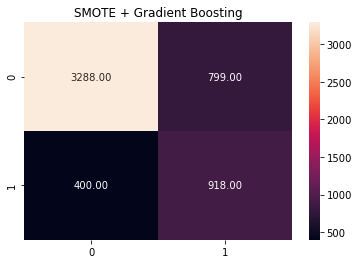

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.85      4087
         1.0       0.53      0.70      0.60      1318

    accuracy                           0.78      5405
   macro avg       0.71      0.75      0.73      5405
weighted avg       0.80      0.78      0.79      5405

Accuracy:0.78
Training score:0.83
F1 score:0.60
Recall:0.70
AUC:0.80
Times:3.25


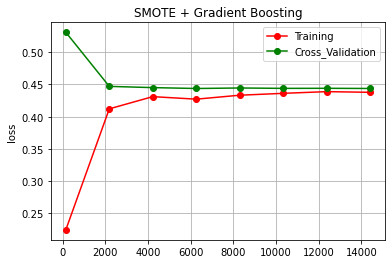

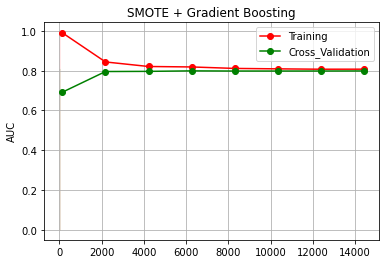

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=GradientBoostingClassifier(n_estimators=668,max_depth=3,max_features=1,subsample=1,learning_rate=0.01,random_state=111)
title='SMOTE + Gradient Boosting'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> Tomek Links + Gradient Boosting之參數調整</h3>

* 透過Random Search方式進行參數調整

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad_tomeklinks_pipe=make_pipeline(TomekLinks(),GradientBoostingClassifier())
grad_tomeklinks_optimal=RandomizedSearchCV(grad_tomeklinks_pipe,grad_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
grad_tomeklinks_optimal.fit(x_train,y_train)
print(grad_tomeklinks_optimal.best_params_)
print(grad_tomeklinks_optimal.best_score_)

{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 5, 'gradientboostingclassifier__max_features': 0.7, 'gradientboostingclassifier__n_estimators': 511, 'gradientboostingclassifier__subsample': 0.7}
0.7884680307154353


<h3>Tomek Links + Gradient Boosting預測模型建立

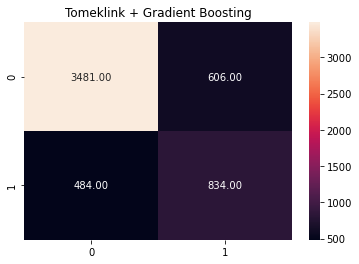

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      4087
         1.0       0.58      0.63      0.60      1318

    accuracy                           0.80      5405
   macro avg       0.73      0.74      0.73      5405
weighted avg       0.81      0.80      0.80      5405

Accuracy:0.80
Training score:0.83
F1 score:0.60
Recall:0.63
AUC:0.80
Times:3.69


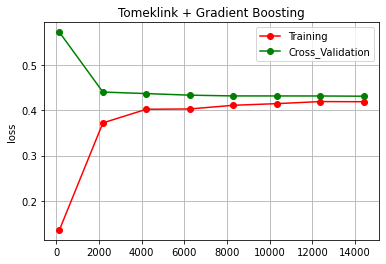

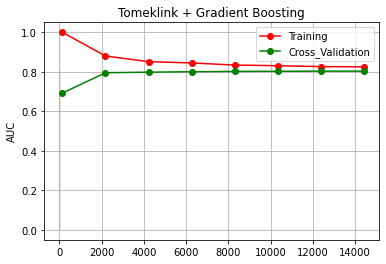

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425


In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
model=GradientBoostingClassifier(n_estimators=374,max_depth=4,max_features=0.9,subsample=1,learning_rate=0.01,random_state=111)
title='Tomeklink + Gradient Boosting'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> SMOTEENN + Gradient Boosting之參數調整</h3>

* 透過Random Search方式進行參數調整

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),GradientBoostingClassifier())
grad_smoteenn_optimal=RandomizedSearchCV(grad_smoteenn_pipe,grad_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
grad_smoteenn_optimal.fit(x_train,y_train)
print(grad_smoteenn_optimal.best_params_)
print(grad_smoteenn_optimal.best_score_)

{'gradientboostingclassifier__learning_rate': 0.03, 'gradientboostingclassifier__max_depth': 16, 'gradientboostingclassifier__max_features': 0.6, 'gradientboostingclassifier__n_estimators': 673, 'gradientboostingclassifier__subsample': 0.6}
0.7940596354353455


<h3>SMOTEENN + Gradient Boosting預測模型建立

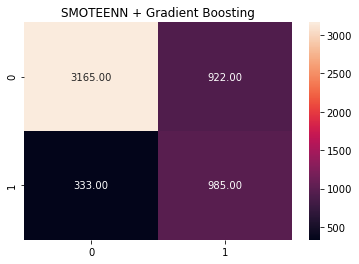

              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83      4087
         1.0       0.52      0.75      0.61      1318

    accuracy                           0.77      5405
   macro avg       0.71      0.76      0.72      5405
weighted avg       0.81      0.77      0.78      5405

Accuracy:0.77
Training score:0.94
F1 score:0.61
Recall:0.75
AUC:0.80
Times:5.54


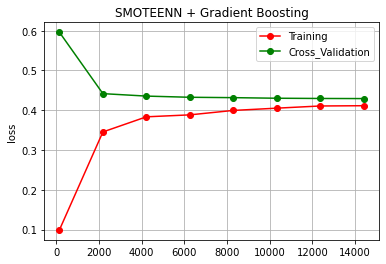

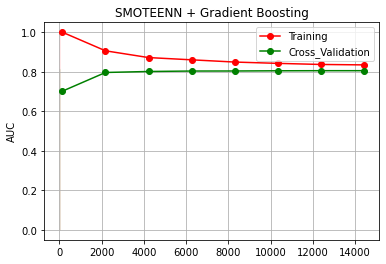

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425
SMOTEENN + Gradient Boosting,0.767808,0.610853,0.747344,0.800090,5.542182


In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
grad=GradientBoostingClassifier(n_estimators=554,max_depth=4,max_features=0.8,subsample=0.6,learning_rate=0.01,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
title='SMOTEENN + Gradient Boosting'
form=model_training(x_res,y_res,grad,title)
overfitting_check_loss(grad,title)
overfitting_check(grad,title)
form

<h3> SMOTE + XGBoost之參數調整</h3>

* 透過Random Search方式進行參數調整

In [56]:
#from scipy.stats import randint
xgb_params={
    'xgbclassifier__n_estimators':randint(100,1000),
    'xgbclassifier__subsample':[0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__colsample_bytree':[0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'xgbclassifier__gamma':[0.1,0.3,0.5,0.7,0.9,1,2,3,4,5,6,7,8,9,10],
    'xgbclassifier__random_state':[111],
    'xgbclassifier__max_depth':randint(3,20),
    'xgbclassifier__random_state':[111]
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
xgb_smote_pipe=make_pipeline(SMOTE(random_state=111),XGBClassifier())
xgb_smote_optimal=RandomizedSearchCV(xgb_smote_pipe,xgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
xgb_smote_optimal.fit(x_train,y_train)
print(xgb_smote_optimal.best_params_)
print(xgb_smote_optimal.best_score_)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'xgbclassifier__colsample_bytree': 0.6, 'xgbclassifier__gamma': 8, 'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 17, 'xgbclassifier__n_estimators': 435, 'xgbclassifier__random_state': 111, 'xgbclassifier__subsample': 0.9}
0.8044912482225


<h3>SMOTE + XGBoost預測模型建立

[14:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


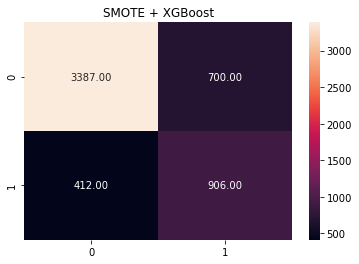

              precision    recall  f1-score   support

         0.0       0.89      0.83      0.86      4087
         1.0       0.56      0.69      0.62      1318

    accuracy                           0.79      5405
   macro avg       0.73      0.76      0.74      5405
weighted avg       0.81      0.79      0.80      5405

Accuracy:0.79
Training score:0.85
F1 score:0.62
Recall:0.69
AUC:0.80
Times:2.09


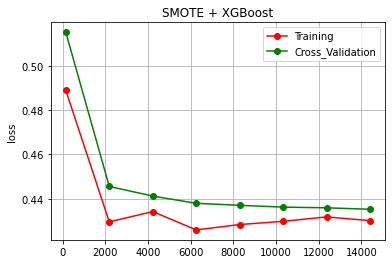

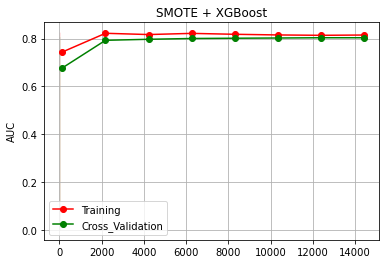

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425
SMOTEENN + Gradient Boosting,0.767808,0.610853,0.747344,0.800090,5.542182
SMOTE + XGBoost,0.794265,0.619699,0.687405,0.801827,2.087411


In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=XGBClassifier(n_estimators=258,max_depth=5,colsample_bytree=1,subsample=0.8,gamma=8,learning_rate=0.01,random_state=111)
title='SMOTE + XGBoost'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> Tomek Links + XGBoost之參數調整</h3>

* 透過Random Search方式進行參數調整

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
xgb_tomeklinks_pipe=make_pipeline(TomekLinks(),XGBClassifier())
xgb_tomeklinks_optimal=RandomizedSearchCV(xgb_tomeklinks_pipe,xgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
xgb_tomeklinks_optimal.fit(x_train,y_train)
print(xgb_tomeklinks_optimal.best_params_)
print(xgb_tomeklinks_optimal.best_score_)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'xgbclassifier__colsample_bytree': 1, 'xgbclassifier__gamma': 0.7, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 6, 'xgbclassifier__n_estimators': 418, 'xgbclassifier__random_state': 111, 'xgbclassifier__subsample': 0.9}
0.8041670657499695


<h3>Tomek Links + XGBoost預測模型建立

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


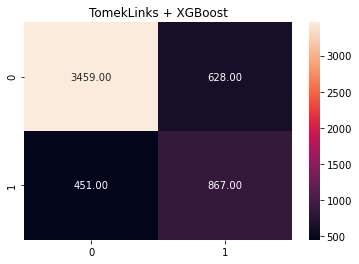

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      4087
         1.0       0.58      0.66      0.62      1318

    accuracy                           0.80      5405
   macro avg       0.73      0.75      0.74      5405
weighted avg       0.81      0.80      0.80      5405

Accuracy:0.80
Training score:0.83
F1 score:0.62
Recall:0.66
AUC:0.80
Times:9.32


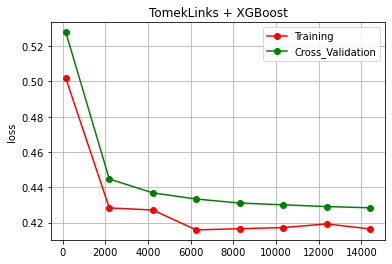

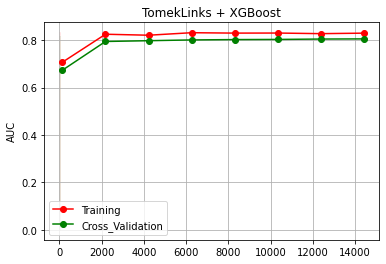

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425
SMOTEENN + Gradient Boosting,0.767808,0.610853,0.747344,0.800090,5.542182
SMOTE + XGBoost,0.794265,0.619699,0.687405,0.801827,2.087411


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
model=XGBClassifier(n_estimators=858,max_depth=11,colsample_bytree=0.7,subsample=1,gamma=10,learning_rate=0.01,random_state=111)
title='TomekLinks + XGBoost'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> SMOTEENN + XGBoost之參數調整</h3>

* 透過Random Search方式進行參數調整

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
xgb_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),XGBClassifier())
xgb_smoteenn_optimal=RandomizedSearchCV(xgb_smoteenn_pipe,xgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
xgb_smoteenn_optimal.fit(x_train,y_train)
print(xgb_smoteenn_optimal.best_params_)
print(xgb_smoteenn_optimal.best_score_)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'xgbclassifier__colsample_bytree': 0.9, 'xgbclassifier__gamma': 7, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 18, 'xgbclassifier__n_estimators': 698, 'xgbclassifier__random_state': 111, 'xgbclassifier__subsample': 0.6}
0.7967400339416212


<h3>SMOTEENN + XGBoost預測模型建立

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


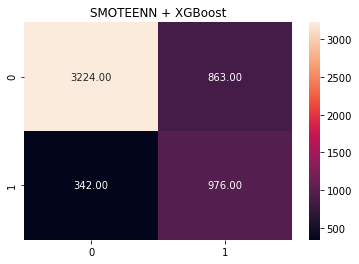

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84      4087
         1.0       0.53      0.74      0.62      1318

    accuracy                           0.78      5405
   macro avg       0.72      0.76      0.73      5405
weighted avg       0.81      0.78      0.79      5405

Accuracy:0.78
Training score:0.95
F1 score:0.62
Recall:0.74
AUC:0.80
Times:4.92


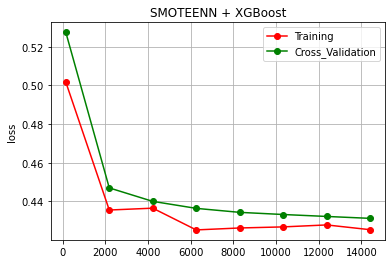

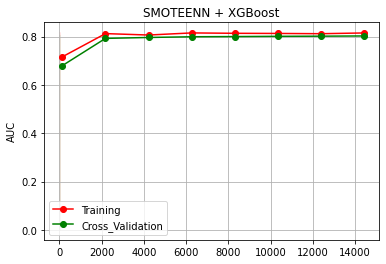

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425
SMOTEENN + Gradient Boosting,0.767808,0.610853,0.747344,0.800090,5.542182
SMOTE + XGBoost,0.794265,0.619699,0.687405,0.801827,2.087411


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
model=XGBClassifier(n_estimators=506,max_depth=11,colsample_bytree=0.9,subsample=0.6,gamma=12,learning_rate=0.01,random_state=111)
title='SMOTEENN + XGBoost'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> SMOTE + LGBM之參數調整</h3>

* 透過Random Search方式進行參數調整

In [62]:
lgb_params={
    'lgbmclassifier__boosting_type':['gbdt','rf'],
    'lgbmclassifier__max_depth':randint(3,20),
    'lgbmclassifier__num_leaves':randint(1,512),
    'lgbmclassifier__min_data_in_leaf':randint(1,512),
    'lgbmclassifier__bagging_fraction':[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'lgbmclassifier__bagging_freq':randint(1,10),
    'lgbmclassifier__learning_rate':[0.01,0.03,0.05,0.07,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
lgbm_model=lgb.LGBMClassifier()
lgbm_smote_pipe=make_pipeline(SMOTE(random_state=111),lgbm_model)
lgbm_smote_optimal=RandomizedSearchCV(lgbm_smote_pipe,lgb_params,n_iter=10,scoring='roc_auc',cv=k,n_jobs=-1)
lgbm_smote_optimal.fit(x_train,y_train)
print(lgbm_smote_optimal.best_params_)
print(lgbm_smote_optimal.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set=122, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=122
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
{'lgbmclassifier__bagging_fraction': 0.5, 'lgbmclassifier__bagging_freq': 8, 'lgbmclassifier__boosting_type': 'rf', 'lgbmclassifier__learning_rate': 0.4, 'lgbmclassifier__max_depth': 7, 'lgbmclassifier__min_data_in_leaf': 122, 'lgbmclassifier__num_leaves': 393}
0.7871309067675204


<h3>SMOTE + LGBM預測模型建立

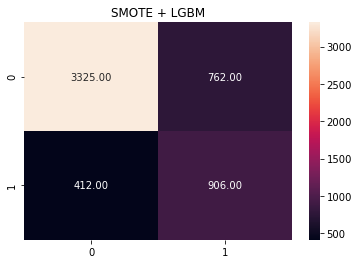

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      4087
         1.0       0.54      0.69      0.61      1318

    accuracy                           0.78      5405
   macro avg       0.72      0.75      0.73      5405
weighted avg       0.81      0.78      0.79      5405

Accuracy:0.78
Training score:0.84
F1 score:0.61
Recall:0.69
AUC:0.80
Times:0.20


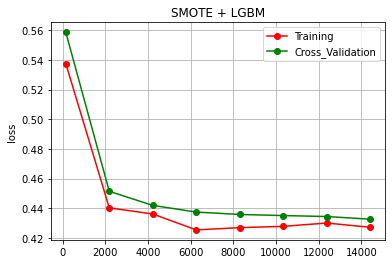

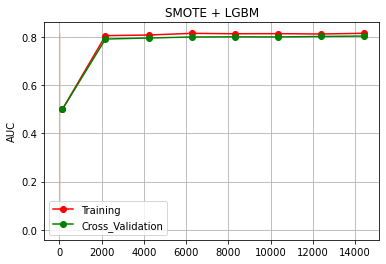

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425
SMOTEENN + Gradient Boosting,0.767808,0.610853,0.747344,0.800090,5.542182
SMOTE + XGBoost,0.794265,0.619699,0.687405,0.801827,2.087411


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTE(random_state=111).fit_resample(x_train,y_train)
model=lgb.LGBMClassifier(boosting_type='gbdt',
                         max_depth=4,bagging_fraction=0.9,min_data_in_leaf=326,
                         bagging_freq=12,learning_rate=0.03,num_leaves=706,n_jobs=-1)
title='SMOTE + LGBM'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> Tomek Links + LGBM之參數調整</h3>

* 透過Random Search方式進行參數調整

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
lgbm_model=lgb.LGBMClassifier()
lgbm_tomeklinks_pipe=make_pipeline(TomekLinks(),lgbm_model)
lgbm_tomeklinks_optimal=RandomizedSearchCV(lgbm_tomeklinks_pipe,lgb_params,n_iter=10,cv=k,scoring='roc_auc',n_jobs=-1)
lgbm_tomeklinks_optimal.fit(x_train,y_train)
print(lgbm_tomeklinks_optimal.best_params_)
print(lgbm_tomeklinks_optimal.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set=496, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=496
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
{'lgbmclassifier__bagging_fraction': 0.8, 'lgbmclassifier__bagging_freq': 7, 'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__learning_rate': 0.09, 'lgbmclassifier__max_depth': 12, 'lgbmclassifier__min_data_in_leaf': 496, 'lgbmclassifier__num_leaves': 197}
0.8026573540918693


<h3>Tomek Links + LGBM預測模型建立

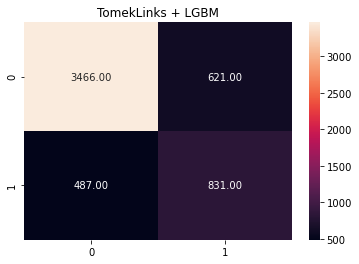

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      4087
         1.0       0.57      0.63      0.60      1318

    accuracy                           0.80      5405
   macro avg       0.72      0.74      0.73      5405
weighted avg       0.80      0.80      0.80      5405

Accuracy:0.80
Training score:0.82
F1 score:0.60
Recall:0.63
AUC:0.80
Times:0.10


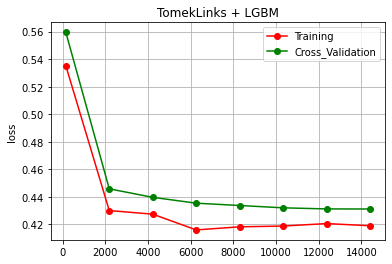

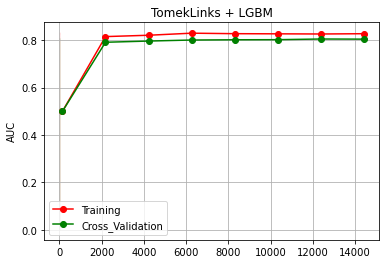

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425
SMOTEENN + Gradient Boosting,0.767808,0.610853,0.747344,0.800090,5.542182
SMOTE + XGBoost,0.794265,0.619699,0.687405,0.801827,2.087411


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=TomekLinks().fit_resample(x_train,y_train)
model=lgb.LGBMClassifier(boosting_type='gbdt',
                         max_depth=6,bagging_fraction=1,min_data_in_leaf=252,
                         bagging_freq=6,learning_rate=0.03,num_leaves=440,n_jobs=-1)
title='TomekLinks + LGBM'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

<h3> SMOTEENN + LGBM之參數調整</h3>

* 透過Random Search方式進行參數調整

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
lgbm_model=lgb.LGBMClassifier()
lgbm_smoteenn_pipe=make_pipeline(SMOTEENN(random_state=111),lgbm_model)
lgbm_smoteenn_optimal=RandomizedSearchCV(lgbm_smoteenn_pipe,lgb_params,n_iter=10,scoring='roc_auc',cv=k,n_jobs=-1)
lgbm_smoteenn_optimal.fit(x_train,y_train)
print(lgbm_smoteenn_optimal.best_params_)
print(lgbm_smoteenn_optimal.best_score_)

[LightGBM] [Warning] min_data_in_leaf is set=463, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=463
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
{'lgbmclassifier__bagging_fraction': 0.8, 'lgbmclassifier__bagging_freq': 6, 'lgbmclassifier__boosting_type': 'gbdt', 'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 16, 'lgbmclassifier__min_data_in_leaf': 463, 'lgbmclassifier__num_leaves': 161}
0.798428970168515


<h3>SMOTEENN + LGBM預測模型建立

[LightGBM] [Warning] min_data_in_leaf is set=374, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=374
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12


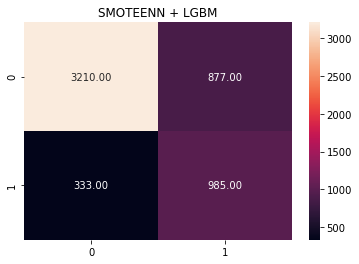

              precision    recall  f1-score   support

         0.0       0.91      0.79      0.84      4087
         1.0       0.53      0.75      0.62      1318

    accuracy                           0.78      5405
   macro avg       0.72      0.77      0.73      5405
weighted avg       0.81      0.78      0.79      5405

Accuracy:0.78
Training score:0.94
F1 score:0.62
Recall:0.75
AUC:0.80
Times:0.14


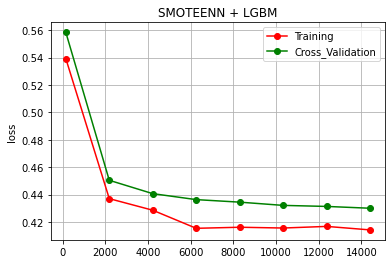

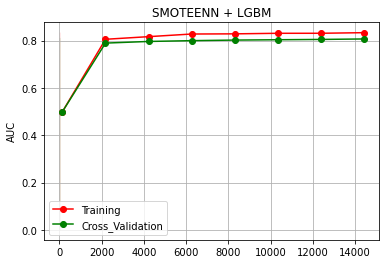

,Accuracy,F1,Recall,AUC,Speed(s)
SMOTE + Random Forest,0.789824,0.621081,0.706373,0.800693,7.662416
TomekLinks + Random Forest,0.796115,0.600725,0.628983,0.799363,5.330383
SMOTEENN + Random Forest,0.759112,0.603049,0.750379,0.797492,1.547607
SMOTE + Bagging,0.790194,0.572720,0.576631,0.792106,1.734555
Tomeklink + Bagging,0.794265,0.559080,0.534901,0.796463,3.059702
SMOTEENN + Bagging,0.783534,0.617897,0.717754,0.797450,3.595027
SMOTE + Gradient Boosting,0.778168,0.604942,0.696510,0.795936,3.253643
Tomeklink + Gradient Boosting,0.798335,0.604786,0.632777,0.800157,3.690425
SMOTEENN + Gradient Boosting,0.767808,0.610853,0.747344,0.800090,5.542182
SMOTE + XGBoost,0.794265,0.619699,0.687405,0.801827,2.087411


In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
model=lgb.LGBMClassifier(boosting_type='gbdt',
                         max_depth=11,bagging_fraction=1,min_data_in_leaf=374,
                         bagging_freq=12,learning_rate=0.04,num_leaves=27,n_jobs=-1)
title='SMOTEENN + LGBM'
form=model_training(x_res,y_res,model,title)
overfitting_check_loss(model,title)
overfitting_check(model,title)
form

[LightGBM] [Warning] min_data_in_leaf is set=374, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=374
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12


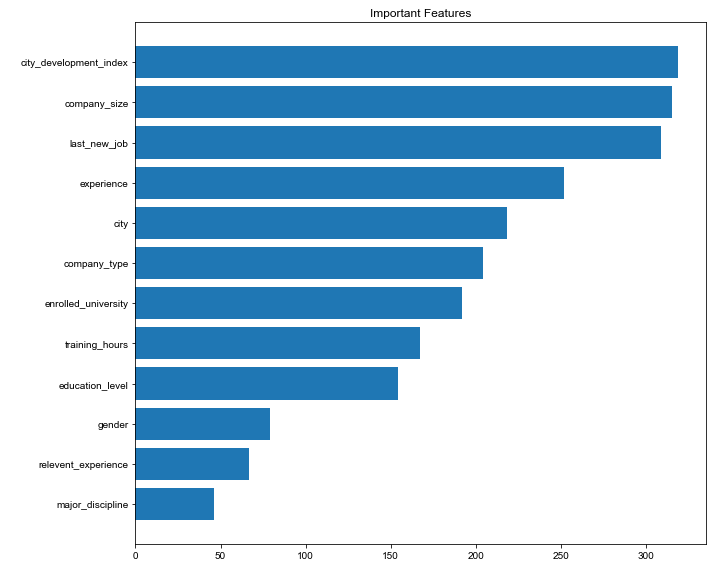

In [70]:
#feature importances
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(xtrain,ytrain)
clf=lgb.LGBMClassifier(boosting_type='gbdt',
                         max_depth=11,bagging_fraction=1,min_data_in_leaf=374,
                         bagging_freq=12,learning_rate=0.04,num_leaves=27,n_jobs=-1)
clf.fit(x_res,y_res)
importance=clf.feature_importances_
indices=np.argsort(importance)
feature=train_dataset.drop(['target','enrollee_id'],axis=1).columns.tolist()
feat_imp=np.array(feature)[indices]
values=importance[indices]
y_ticks=np.arange(0,len(feature))
fig,ax=plt.subplots(figsize=(10,8))
ax.barh(y_ticks,values)
ax.set_yticklabels(feat_imp)
ax.set_yticks(y_ticks)
plt.title('Important Features')
fig.tight_layout()
sns.set_style('whitegrid')
plt.show()


#----------------------------
#best_feature=feat_imp[-9:,]
#new_data=train_dataset[['enrollee_id'] + list(best_feature) + ['target']]
#new_data

* 透過random forest、XGBoot、LGBM可以找出較為重要的特徵，以便於進行特徵的擷取，去除對於模型不重要的特徵，以提升整體模型效能。
* 除非資料維度過高、複雜，不然原則上特徵越多越好。經過幾次的嘗試也發現，在進行特徵選擇後，其模型表現並沒有比全部保留來的好。

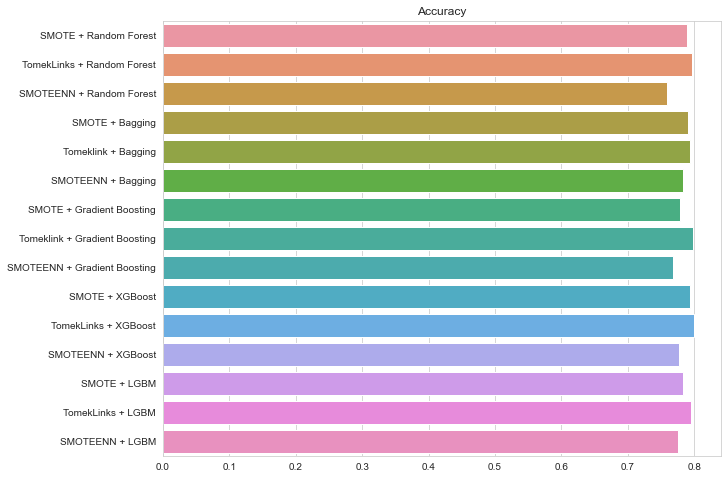

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x=list(accuracy.values()),y=list(accuracy.keys()))
plt.title('Accuracy')
plt.show()

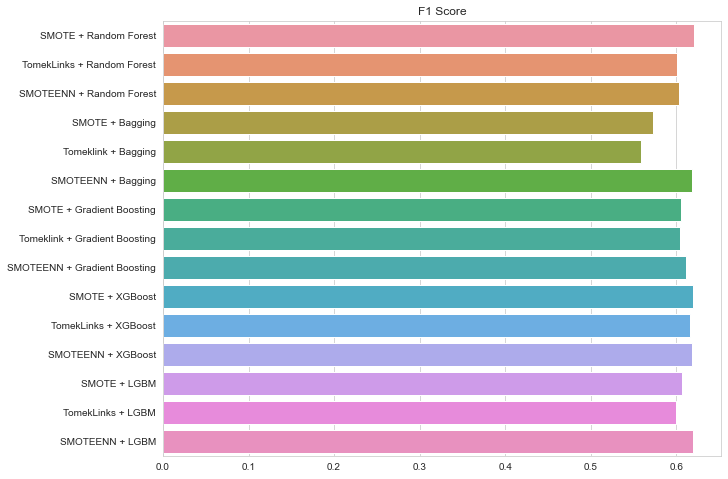

In [77]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x=list(f1.values()),y=list(f1.keys()))
plt.title('F1 Score')
plt.show()

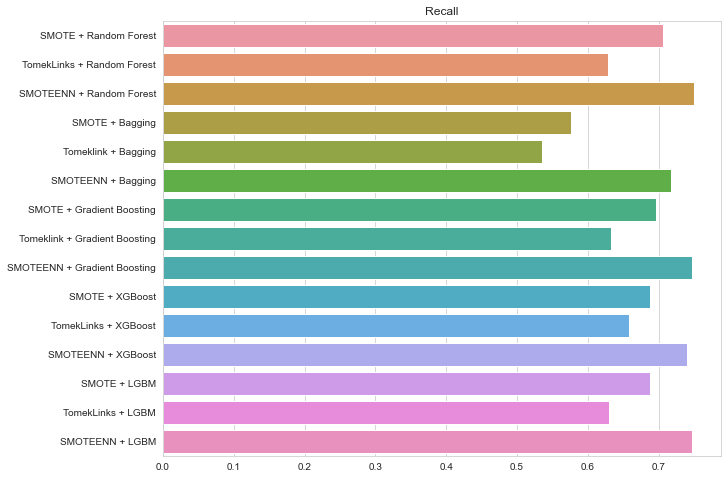

In [78]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x=list(recall.values()),y=list(recall.keys()))
plt.title('Recall')
plt.show()

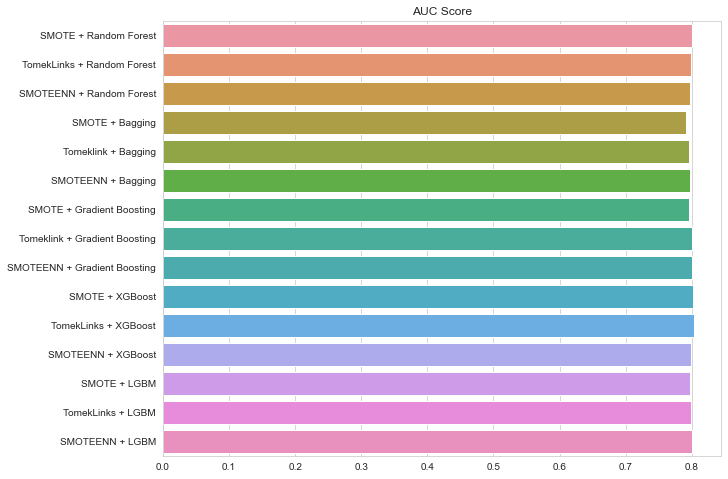

In [79]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x=list(auc.values()),y=list(auc.keys()))
plt.title('AUC Score')
plt.show()

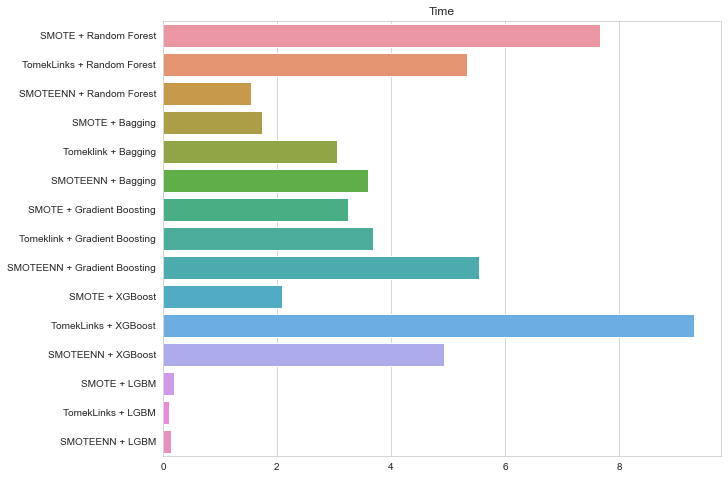

In [80]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x=list(speed.values()),y=list(speed.keys()))
plt.title('Time')
plt.show()

* 於此主要以模型的AUC、F1、Recall與速度的表現，作為模型選定的考量依據。故於此主要以SMOTEENN + LGBM的方式最佳。

<h2>Step4 測試集資料整理與預測

<h3>測試集資料讀入

In [81]:
test_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,78,0.827,0.0,1,2.0,2.0,0.0,9.0,0.0,NaN,1.0,21
1,9858,5,0.920,1.0,1,0.0,2.0,0.0,5.0,NaN,0.0,1.0,98
2,31806,64,0.624,0.0,0,0.0,1.0,NaN,0.0,NaN,0.0,0.0,15
3,27385,26,0.827,0.0,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,5,0.920,0.0,1,0.0,2.0,0.0,21.0,7.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,NaN,1.0,4.0,15
2125,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,NaN,NaN,2.0,30
2126,31762,2,0.887,0.0,0,0.0,0.0,NaN,3.0,NaN,0.0,0.0,18
2127,7873,4,0.804,0.0,1,2.0,1.0,NaN,7.0,3.0,1.0,1.0,84


<h3>遺漏值填補

In [82]:
test_dataset['gender'].fillna(value=-1,inplace=True)
test_dataset['major_discipline'].fillna(value=-1,inplace=True)
test_dataset['company_size'].fillna(value=-1,inplace=True)
test_dataset['company_type'].fillna(value=-1,inplace=True)
test_dataset.dropna(subset=['enrolled_university','education_level','experience','last_new_job'],axis=0,inplace=True)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2018 non-null   int64  
 1   city                    2018 non-null   int32  
 2   city_development_index  2018 non-null   float64
 3   gender                  2018 non-null   float64
 4   relevent_experience     2018 non-null   int64  
 5   enrolled_university     2018 non-null   float64
 6   education_level         2018 non-null   float64
 7   major_discipline        2018 non-null   float64
 8   experience              2018 non-null   float64
 9   company_size            2018 non-null   float64
 10  company_type            2018 non-null   float64
 11  last_new_job            2018 non-null   float64
 12  training_hours          2018 non-null   int64  
dtypes: float64(9), int32(1), int64(3)
memory usage: 212.8 KB


In [83]:
test_dataset

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,78,0.827,0.0,1,2.0,2.0,0.0,9.0,0.0,-1.0,1.0,21
1,9858,5,0.920,1.0,1,0.0,2.0,0.0,5.0,-1.0,0.0,1.0,98
2,31806,64,0.624,0.0,0,0.0,1.0,-1.0,0.0,-1.0,0.0,0.0,15
3,27385,26,0.827,0.0,1,0.0,3.0,0.0,11.0,1.0,0.0,1.0,39
4,27724,5,0.920,0.0,1,0.0,2.0,0.0,21.0,7.0,0.0,5.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.920,0.0,0,0.0,2.0,3.0,16.0,-1.0,1.0,4.0,15
2125,195,30,0.897,0.0,1,0.0,3.0,0.0,18.0,-1.0,-1.0,2.0,30
2126,31762,2,0.887,0.0,0,0.0,0.0,-1.0,3.0,-1.0,0.0,0.0,18
2127,7873,4,0.804,0.0,1,2.0,1.0,-1.0,7.0,3.0,1.0,1.0,84


<h3>資料建模與預測

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=111)
x_res,y_res=SMOTEENN(random_state=111).fit_resample(x_train,y_train)
clf=lgb.LGBMClassifier(boosting_type='gbdt',
                         max_depth=12,bagging_fraction=1,min_data_in_leaf=374,
                         bagging_freq=10,learning_rate=0.04,num_leaves=27,n_jobs=-1)
clf.fit(x_res,y_res)
predict=clf.predict_proba(test_dataset.drop(['enrollee_id'],axis=1))[:,1] #該題目要求求出員工離職機率。
#predict=clf.predict(test_dataset.drop(['enrollee_id'],axis=1))  #直接四捨五入，顯示離職或不會離職。
submssion=pd.DataFrame({'enrollee_id':test_dataset['enrollee_id'],
                      'target':predict})
submssion.head(20)

,enrollee_id,target
0,32403,0.570385
1,9858,0.585906
2,31806,0.953011
3,27385,0.139848
4,27724,0.055326
5,217,0.735348
6,21465,0.963044
7,27302,0.607556
8,12994,0.510311
9,16287,0.954354


<h2>END</h2>